In [ ]:
%matplotlib inline
from google.colab import files, drive 
import numpy as np                # mathematical calculations
from io import BytesIO            # reading files
from PIL import Image             # image processing library
import matplotlib.pyplot as plt

In [ ]:
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


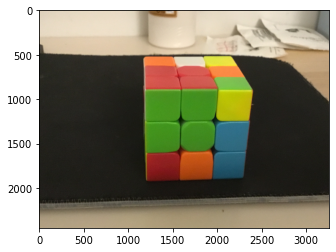

In [ ]:
img = Image.open("/content/drive/MyDrive/coding/Image Sharpening/rubix_cube.jpg")
im = np.array(img)
plt.imshow(im)

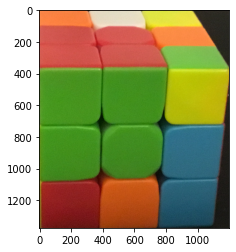

In [ ]:
crop = im[525:1900, 1200:2400, :]
plt.imshow(crop)

In [ ]:
r = crop[:, :, 0].astype(np.float32)
g = crop[:, :, 1].astype(np.float32)
b = crop[:, :, 2].astype(np.float32)

In [ ]:
def greyscale(image):
  image = (0.3 * image[:, :, 0]) + (0.59 * image[:, :, 1]) + (0.11 * image[:, :, 2])
  return image.astype(np.float32)

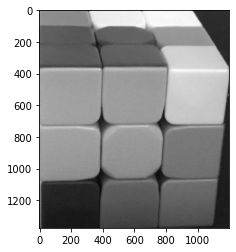

In [ ]:
# g = greyscale(crop)
# g = g/g.max()
plt.imshow(g, cmap = 'gray')

In [ ]:
def smoother(image):
  output = image.copy().astype(np.float32)
  x, y = image.shape
  for a in range(1, x - 1):
    for b in range(1, y - 1):
      av = (image[a - 1, b- 1]) + (image[a - 1, b]) + (image[a - 1, b + 1])
      av += (image[a, b - 1 ]) + (image[a, b]) + (image[a, b + 1])
      av += (image[a + 1, b - 1]) + (image[a + 1, b]) + (image[a + 1, b + 1])
      av /= 9
      output[a, b] = av
  return output
def detail(grey, smooth):
  output = grey.copy().astype(np.float32)
  x, y = grey.shape
  output = grey - smooth
  return np.abs(output)

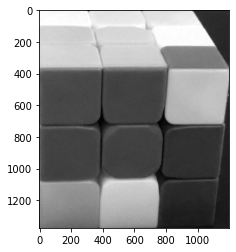

In [ ]:
smooth = smoother(r)
plt.imshow(smooth, cmap = "gray")

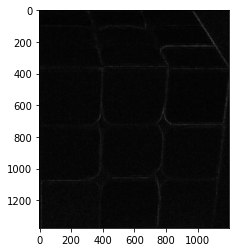

In [ ]:
details = detail(r, smooth)
plt.imshow(details, cmap = 'gray')

In [ ]:
def sharp(grey, detail, d):
  output = grey.copy()
  output += detail*d
  return output
def edge_detection2(image):
  output = image.copy().astype(np.float32)
  x, y = image.shape
  for a in range(1, x - 1):
    for b in range(1, y - 1):
      output[a, b] = (8 * image[a, b]) - image[a + 1, b + 1] - image[a + 1, b] - image[a + 1, b - 1] - image[a, b - 1] - image[a, b + 1] - image[a - 1, b - 1] - image[a - 1, b] - image[a - 1, b + 1]
  return np.abs(output)
def edge_detection(image):
  """
  Takes in a greyscale image and returns the edge detected result. 
  Input:
    image: 2d numpy array that we want to smooth

  Output:
    output: 2d numpy array of detected edges
  """
  # Start off by setting the output to be a copy of the original
  output = image.copy()

  nrows = image.shape[0]
  ncols = image.shape[1]

  # For every non edge pixel, calculate it as the average of its surrounding and self
  # Save average value to same location in output image
  for x in range(1, nrows-1):
    for y in range(1, ncols-1):
      # Add each row
      avg  = 1*image[x-1, y-1]  + (-1)*image[x-1, y+1]
      avg += (-1)*image[x+1, y-1] + 1*image[x+1, y+1]
      output[x,y] = avg
  return np.abs(output)
def edge_detection3(image):
  output = image.copy()
  x, y = image.shape
  for a in range(1, x - 1):
    for b in range(1, y - 1):
      output[a, b] = (4 * image[a, b]) - image[a - 1, b] - image[a + 1, b] - image[a, b - 1] - image[a, b + 1]
  return np.abs(output)

(-0.5, 1199.5, 1374.5, -0.5)

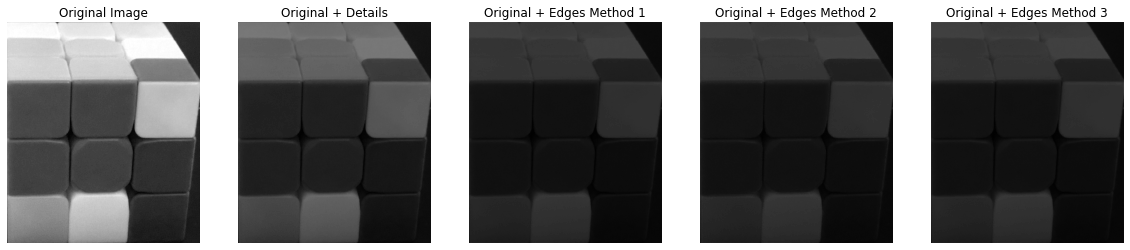

In [ ]:
d = 1
edges2 = edge_detection2(r)
edges = edge_detection(r)
edges3 = edge_detection3(r)
sharpeneddetails = sharp(r, details, d)
sharpened1 = sharp(r, edges, d)
sharpened2 = sharp(r, edges2, d)
sharpened3 = sharp(r, edges3, d)
sharpeneddetails = np.rint(sharpeneddetails*255/sharpeneddetails.max()).astype(np.uint8)
sharpened1 = np.rint(sharpened1*255/sharpened1.max()).astype(np.uint8)
sharpened2 = np.rint(sharpened2*255/sharpened2.max()).astype(np.uint8)
sharpened3 = np.rint(sharpened3*255/sharpened3.max()).astype(np.uint8)
emax = max(details.max(), edges.max(), edges2.max(), edges3.max())
emin = min(details.min(), edges.min(), edges2.min(), edges3.min())
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=[20, 9])
ax1.set_title("Original Image")
ax2.set_title("Original + Details")
ax3.set_title("Original + Edges Method 1")
ax4.set_title("Original + Edges Method 2")
ax5.set_title("Original + Edges Method 3")

im1 = ax1.imshow(r, cmap="gray")
im2 = ax2.imshow(sharpeneddetails, cmap="gray", vmax=r.max() + emax, vmin=r.min() + emin)
im3 = ax3.imshow(sharpened1, cmap = "gray", vmax=r.max() + emax, vmin=r.min() + emin)
im4 = ax4.imshow(sharpened2, cmap = "gray", vmax=r.max() + emax, vmin=r.min() + emin)
im5 = ax5.imshow(sharpened3, cmap = "gray", vmax=r.max() + emax, vmin=r.min() + emin)

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')

In [ ]:
copy = crop.copy()
copy2 = crop.copy()
copy3 = crop.copy()
copy4 = crop.copy()

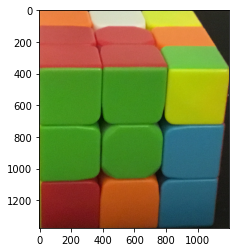

In [ ]:
copy[:, :, 0] = sharpeneddetails
copy2[:, :, 0] = sharpened1
copy3[:, :, 0] = sharpened2
copy4[:, :, 0] = sharpened3
plt.imshow(copy)

255
255
255
255


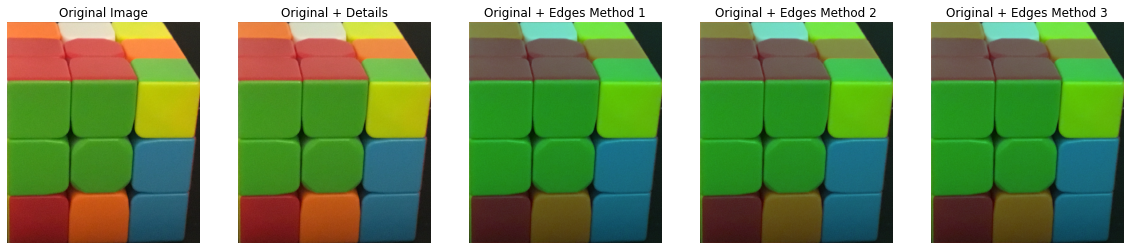

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=[20, 9])
ax1.set_title("Original Image")
ax2.set_title("Original + Details")
ax3.set_title("Original + Edges Method 1")
ax4.set_title("Original + Edges Method 2")
ax5.set_title("Original + Edges Method 3")

im1 = ax1.imshow(crop, cmap="gray")
im2 = ax2.imshow(copy, cmap="gray", vmax=r.max() + emax, vmin=r.min() + emin)
im3 = ax3.imshow(copy2, cmap = "gray", vmax=r.max() + emax, vmin=r.min() + emin)
im4 = ax4.imshow(copy3, cmap = "gray", vmax=r.max() + emax, vmin=r.min() + emin)
im5 = ax5.imshow(copy4, cmap = "gray", vmax=r.max() + emax, vmin=r.min() + emin)

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')
print(sharpeneddetails.max())
print(sharpened1.max())
print(sharpened2.max())
print(sharpened3.max())